# ML regression to predict the Efficacy of an active G9a inhibitor, using Dataset 
3

### Content   <a name="content"></a>

1. [Data loading and observations](#1)
2. [Regression Machine Learning](#2)
3. [Cros-validation](#3)
4. [Analyse the predictions according to their diapason. The all features case.](#4)
5. [Permutation feature importance methods for the Support Vector Regressorr](#5)
6. [Comparison of the first elevent features  from the permutation importance order](#6)
7. [Chose the model](#7)
8. [Hyper parameter tuning of the new model. TPSA & XL case.](#8)
9. [Analyse the predictions according to their diapason. The TPSA & XL case.](#9)
10. [The Molecular weight model](#10)
11. [Hyper parameter tuning of the new model. The MW case.](#11)
12. [Analyse the predictions according to their diapason. The MW case.](#12)
13. [Aqueous Solubility at pH7.4 Mean model](#13)
14. [Hyper parameter tuning of the new model. The Solubility data case](#14)
15. [Analyse the predictions according to their diapason. The Solubility data case.](#15)

## Data loading and observations <a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_Efficacy_with_solub_and_imputation.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (5310, 61)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
0,125.832,337.40,94.2,22.9,24,1,5,5,1,7.4631,8.6021,19.963043,19.881405,10.1174,11.2860,20.047873,20.324161,1.235937,2.285504e-03,9.8034,12.2149,19.935856,19.808128,6.1795,8.7580,20.405029,20.203442,3.1598,4.9744,19.952756,19.824369,127.312374,21.047793,20.379100,20.585478,0.44,0.38,0.03,0.03,0.13,0.0,0.00,0.0,60.52,4.48,4.74,9.50,20.76,0.0,0.00,0.0,20.737650,20.762192,1.586439,1.394713,3.102538,2.455552,1.955662,1.760614,20.045,22.200000
1,159.927,391.50,145.0,23.2,25,1,7,4,1,13.3389,13.3389,19.986803,19.931411,9.3818,9.3818,19.996973,19.950942,0.000000,2.283697e-09,13.3236,15.4208,20.054043,20.208981,5.1669,7.5494,20.607818,20.344061,2.3667,4.2663,19.237999,19.434229,90.088600,20.405571,20.041752,20.316693,0.42,0.34,0.08,0.08,0.08,0.0,0.00,0.0,49.09,3.35,12.26,24.57,10.73,0.0,0.00,0.0,21.421785,21.421785,2.578645,2.042652,5.629611,3.614561,2.183166,1.769543,20.049,17.960556
2,154.866,293.34,78.7,21.6,20,0,4,5,1,10.3905,11.4264,20.051936,19.758394,5.2570,7.9578,19.523062,19.353399,38.342612,4.282801e-01,10.1478,13.3207,19.611802,19.984691,4.2735,5.6810,19.471141,19.557996,2.3743,4.2323,19.915592,19.927372,68.849533,20.104155,20.202745,20.029847,0.40,0.43,0.11,0.03,0.03,0.0,0.00,0.0,57.32,5.15,21.82,10.93,4.78,0.0,0.00,0.0,21.976508,21.435874,2.374588,2.344781,4.274018,3.147390,1.799899,1.342296,20.036,21.000000
3,133.107,330.40,92.5,22.5,23,1,4,5,1,10.8520,11.8925,19.840402,20.131367,9.0951,9.0951,20.183336,19.753316,0.083054,2.191694e-04,10.2961,11.5105,20.177121,19.972704,6.6456,8.9003,19.247888,19.638222,2.7422,4.8784,20.251344,20.075438,34.212505,20.028410,20.175722,20.149538,0.39,0.44,0.05,0.02,0.10,0.0,0.00,0.0,58.16,5.49,9.68,9.70,16.96,0.0,0.00,0.0,21.193170,21.307572,1.549311,1.293271,3.754686,2.359483,2.423456,1.824430,20.044,24.000000
4,140.597,318.78,107.0,22.1,20,1,5,7,1,14.0384,14.0384,20.469512,20.179811,3.0000,4.2000,20.946284,20.171131,0.195432,1.260465e-01,13.1925,14.8555,20.502508,19.944113,2.4826,5.4797,19.864594,19.969737,1.6693,3.3826,20.327390,19.912363,72.921198,20.950873,20.731400,20.737462,0.34,0.43,0.11,0.03,0.06,0.0,0.03,0.0,45.21,4.74,20.08,10.06,8.79,0.0,11.12,0.0,24.679467,23.342476,5.313985,2.711006,7.903013,4.391740,1.487210,1.619967,20.062,38.000000


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.describe(include="all")

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.00000,5310.000000,5310.000000,5310.0,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000
mean,132.303232,318.748822,83.631141,22.849887,22.181544,1.30904,4.545009,3.987194,1.0,9.980930,10.638028,20.025677,20.023534,8.484624,9.080851,19.958309,19.981974,7.966257e+00,4.763825e-02,10.533911,12.595858,20.009314,20.010952,4.925638,6.966872,19.997542,19.997589,2.490603,4.254746,19.997092,19.996234,6.585178e+01,20.456086,20.786708,20.686421,0.415151,0.416859,0.061030,0.018341,0.077763,0.001254,0.005030,0.004026,60.265209,5.193456,11.476819,6.577866,12.830546,0.929772,1.856098,0.869004,21.412148,21.341961,2.403163,1.905538,128.815280,46.216479,57.200504,25.956369,20.056296,22.695919
std,29.454276,65.295436,33.077178,1.212785,4.661594,0.93868,1.699099,1.970738,0.0,3.176329,3.033890,0.309775,0.275619,3.177327,3.022290,0.369285,0.308950,4.684151e+01,2.663324e-01,2.617596,2.542500,0.325410,0.269524,1.674206,1.595347,0.445613,0.302368,1.205858,1.397154,0.581832,0.401475,8.436849e+01,1.556059,10.335110,9.981879,0.045254,0.065098,0.041377,0.021524,0.039467,0.006542,0.014332,0.016056,9.334322,1.465328,7.328094,7.222684,5.967911,4.682500,4.959285,3.208269,0.965442,0.695266,1.091181,0.600540,886.766056,493.796310,424.076048,294.237612,0.019294,15.055321
min,62.000400,97.070000,0.000000,16.100000,6.000000,0.00000,0.000000,0.000000,1.0,0.714500,2.057200,18.627042,19.106138,0.412500,1.237500,18.657621,18.928861,0.000000e+00,2.260095e-38,1.128300,4.589300,18.534780,18.885661,0.394700,2.878500,17.909794,18.886292,0.000300,0.000500,16.402595,14.612511,3.807599e-07,20.000129,20.000000,20.000007,0.150000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.830000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.576067,0.798337,1.002917,0.908398,0.260297,0.683794,20.011000,0.100000
25%,111.725750,278.355000,60.800000,22.100000,19.000000,1.00000,3.000000,3.000000,1.0,7.696800,8.580400,19.832558,19.849264,6.273825,6.847100,19.721393,19.776828,1.579800e-18,3.129307e-06,8.713775,10.770700,19.811826,19.839129,3.622100,5.737850,19.729997,19.814467,1.753600,3.494425,19.729226,19.822847,2.824164e+01,20.058451,20.042552,20.042288,0.380000,0.380000,0.030000,0.000000,0.050000,0.000000,0.000000,0.000000,54.095000,4.170000,5.650000,0.000000,8.740000,0.000000,0.000000,0.000000,20.822175,20.843565,1.602426,1.443007,3.091459,2.309794,1.458390,1.317562,20.047000,12.700000
50%,130.844000,313.350000,81.300000,22.900000,22.000000,1.00000,4.000000,4.000000,1.0,9.869550,10.218900,20.007891,20.006990,8.255250,8.934250,19.972450,19.980779,8.281494e-02,3.121274e-04,10.377850,12.402600,20.004781,20.011891,4.799500,6.791200,19.999961,20.000069,2.483100,4.350600,19.999096,19.999072,4.485270e+01,20.149898,20.111048,20.110732,0.420000,0.420000,0.060000,0.020000,0.070000,0.000000,0.000000,0.000000,60.535000,5.085000,11.14000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5310 entries, 0 to 5309
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Efficacy              5310 non-null   float64
 1   MW                    5310 non-null   float64
 2   TPSA                  5310 non-null   float64
 3   XL                    5310 non-null   float64
 4   HAC                   5310 non-null   int64  
 5   HBDC                  5310 non-null   int64  
 6   HBAC                  5310 non-null   int64  
 7   RBC                   5310 non-null   int64  
 8   CBUC                  5310 non-null   int64  
 9   MMX6                  5310 non-null   float64
 10  MMX                   5310 non-null   float64
 11  SX6                   5310 non-null   float64
 12  SX                    5310 non-null   float64
 13  MMY6                  5310 non-null   float64
 14  MMY                   5310 non-null   float64
 15  SY6                   5310

[<a href="#content">Back to top</a>]

## Regression Machine Learning <a name="2"></a>

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate the training columns from the target column 'Fit_HillSlope'
X = df.drop(['Efficacy'], axis=1) 
y = df['Efficacy'] 

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (4248, 60)
X_test:   (1062, 60)
y_train:  (4248,)
y_test:   (1062,)


In [7]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the algorithms that will be used, placing them in a dictionary 
regs = {"SVR":SVR(kernel='linear'),
        "DecisionTree":DecisionTreeRegressor(), 
        "RandomForest":RandomForestRegressor(), 
        "GradientBoost":GradientBoostingRegressor(),}

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Create statistics with the results of training with different algorithms
def model_fit(regs):
    fitted_model={}
    model_result = pd.DataFrame()
    for model_name, model in regs.items():
        model.fit(X_train,y_train)
        fitted_model.update({model_name:model})
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.RMSE_Train'] = round(np.sqrt (mean_squared_error(y_train, model.predict(X_train))),2)
        model_dict['3.RMSE_Test'] = round( np.sqrt (mean_squared_error(y_test, model.predict(X_test))),2)
        model_dict['4.MAE_Train'] = round(mean_absolute_error(y_train, model.predict(X_train)),2)
        model_dict['5.MAE_Test'] = round(mean_absolute_error(y_test, model.predict(X_test)),2)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

fitted_model, model_result = model_fit(regs)
model_result.sort_values(by=['5.MAE_Test'],ascending=True)

,1.Algorithm,2.RMSE_Train,3.RMSE_Test,4.MAE_Train,5.MAE_Test
2,RandomForest,10.94,28.87,8.50,22.79
3,GradientBoost,25.98,29.07,20.59,23.05
0,SVR,29.03,29.32,22.65,23.08
1,DecisionTree,0.00,39.51,0.00,31.47


[<a href="#content">Back to top</a>]

## Cross-validation <a name="3"></a>

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of cross-validation
def model_CV(regs):
    fitted_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in regs.items():
        fitted_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5,
                        scoring=('neg_mean_absolute_error'))
        scores = -scores
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.CV_MAE'] = round(np.mean(scores), 2)
        model_dict['3.Sta Dev MAE'] = round(np.std(scores), 2)
        model_dict['4.List of MAE'] = np.round(scores, 2)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return fitted_model, model_cv_result

fitted_model, model_cv_result = model_CV(regs)
model_cv_result.sort_values(by=['2.CV_MAE'],ascending= True)

,1.Algorithm,2.CV_MAE,3.Sta Dev MAE,4.List of MAE
2,RandomForest,22.83,0.59,"[23.63, 23.4, 22.42, 22.11, 22.61]"
3,GradientBoost,23.02,0.50,"[23.7, 23.51, 22.71, 22.36, 22.84]"
0,SVR,23.11,0.58,"[23.77, 23.81, 22.51, 22.49, 22.94]"
1,DecisionTree,33.06,0.84,"[33.08, 33.39, 32.49, 31.94, 34.42]"


[<a href="#content">Back to top</a>]

## Analyse the predictions according to their diapason. The all features case. <a name="4"></a>

In [10]:
import sklearn.metrics as metrics

# Instantiate and train a model
model = SVR().fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2)) 

Mean Absolute Error (MAE): 22.95
Mean Squared Error (MSE): 846.93
Root Mean Squared Error (RMSE): 29.1


In [11]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,164.360,129.427711,34.932289,0.212535
1,119.081,128.529320,9.448320,0.079344
2,135.142,124.847820,10.294180,0.076173
3,128.690,135.045109,6.355109,0.049383
4,177.699,129.019306,48.679694,0.273945
...,...,...,...,...
1057,116.177,131.080948,14.903948,0.128287
1058,140.538,129.379855,11.158145,0.079396
1059,102.809,132.531563,29.722563,0.289105
1060,145.120,126.056459,19.063541,0.131364


In [12]:
mean_ = np.mean(final_output["Relative proportion Difference/Real Value"])
print('Relative proportion Difference/Real Value: ', mean_)

print("From 0 to 0.1:   ", len(final_output[final_output["Relative proportion Difference/Real Value"] <= 0.1]))
print("From 0.1 to 0.2: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.1) & (final_output["Relative proportion Difference/Real Value"] <=0.2)]))
print("From 0.2 to 0.3: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.2) & (final_output["Relative proportion Difference/Real Value"] <=0.3)]))
print("From 0.3 to 0.4: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.3) & (final_output["Relative proportion Difference/Real Value"] <=0.4)]))
print("From 0.4 to 0.5: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.4) & (final_output["Relative proportion Difference/Real Value"] <=0.5)]))
print("From 0.5 to 0.6: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.5) & (final_output["Relative proportion Difference/Real Value"] <=0.6)]))
print("From 0.6 to 0.7: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.6) & (final_output["Relative proportion Difference/Real Value"] <=0.7)]))
print("From 0.7 to 0.8: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.7) & (final_output["Relative proportion Difference/Real Value"] <=0.8)]))
print("From 0.8 to 0.9: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.8) & (final_output["Relative proportion Difference/Real Value"] <=0.9)]))
print("From 0.9 to 1:   ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.9) & (final_output["Relative proportion Difference/Real Value"] <=1)]))

Relative proportion Difference/Real Value:  0.18451121648765254
From 0 to 0.1:    395
From 0.1 to 0.2:  282
From 0.2 to 0.3:  190
From 0.3 to 0.4:  88
From 0.4 to 0.5:  47
From 0.5 to 0.6:  30
From 0.6 to 0.7:  19
From 0.7 to 0.8:  9
From 0.8 to 0.9:  2
From 0.9 to 1:    0


[<a href="#content">Back to top</a>]

## Permutation feature importance methods for the Support Vector Regressor <a name="5"></a>

Text(0.5, 0, 'Permutation Importance')

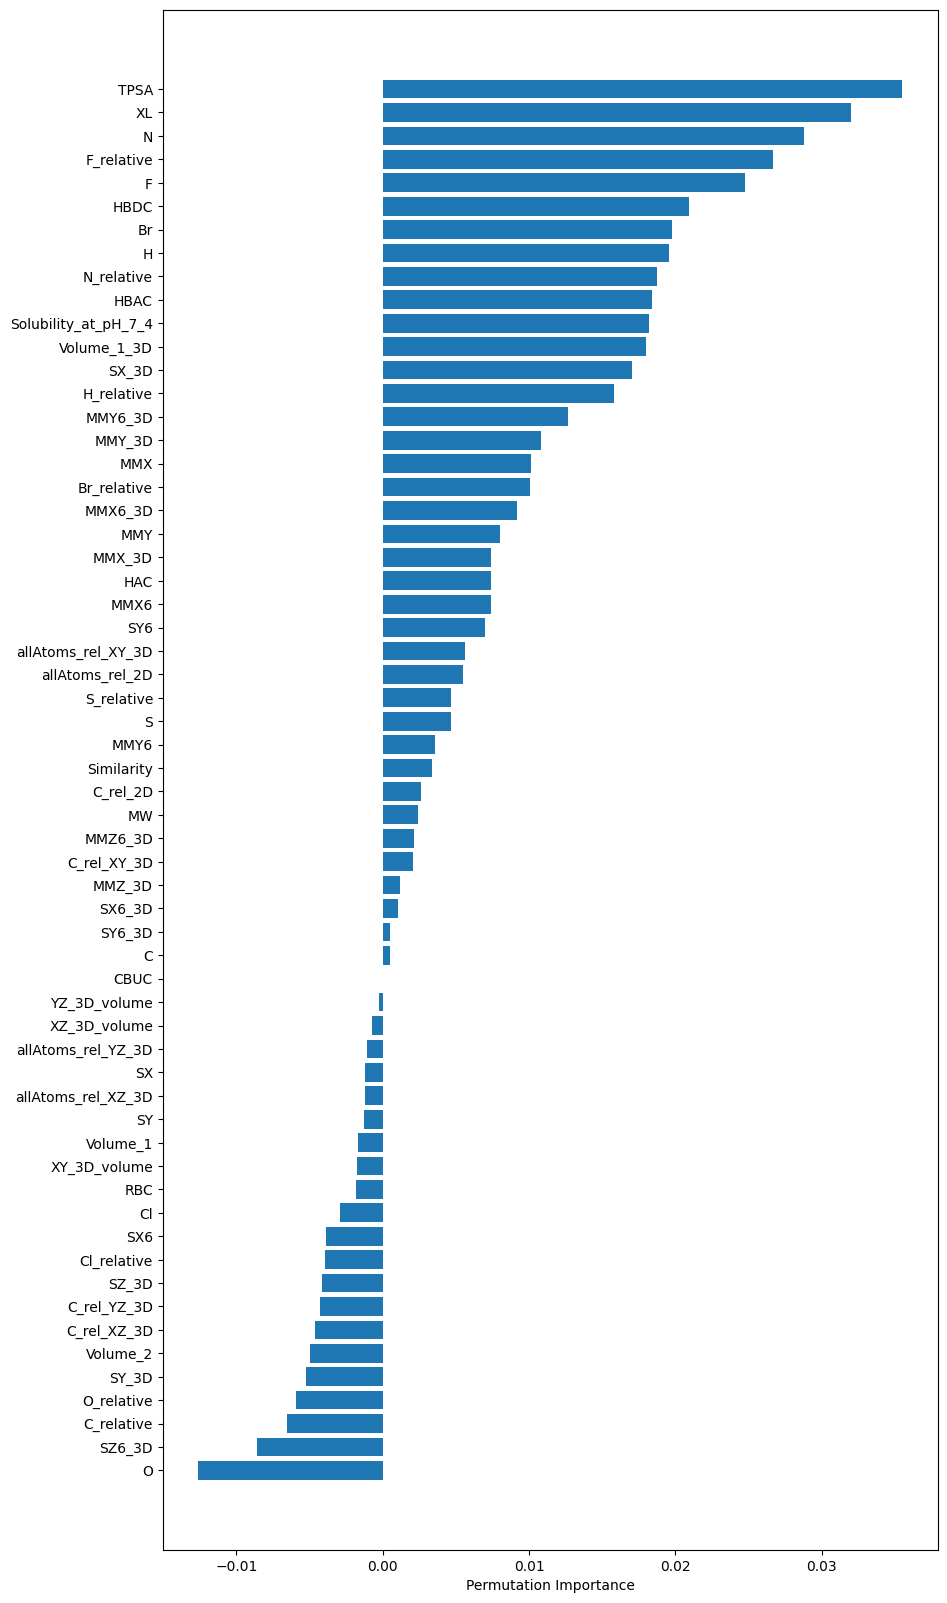

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Instantiate and train the model
model = SVR(kernel='rbf').fit(X_train, y_train)

# Create a list of the column names
feature_names = list(X)

# Convert the list into an array
features = np.array(feature_names)

# Calculate the permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test,
                                         scoring='neg_mean_absolute_error',
                                         random_state=0)

# Sort the result
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

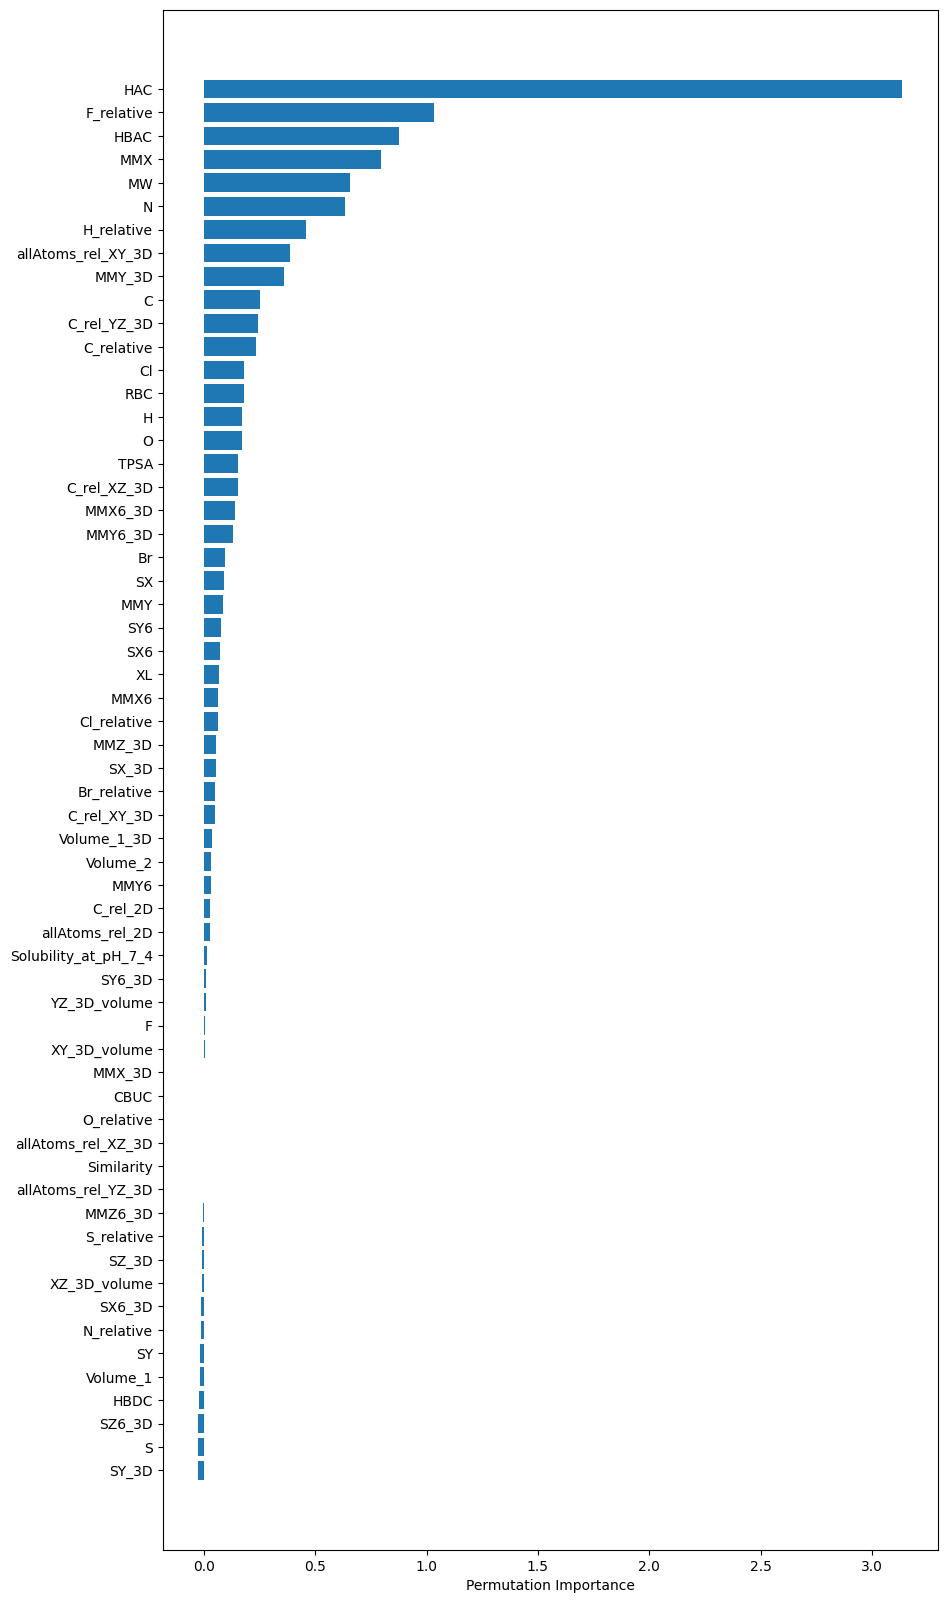

In [14]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Instantiate and train the model
model = SVR(kernel='linear').fit(X_train, y_train)

# Create a list of the column names
feature_names = list(X)

# Convert the list into an array
features = np.array(feature_names)

# Calculate the permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test,
                                         scoring='neg_mean_absolute_error',
                                         random_state=0)

# Sort the result
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

[<a href="#content">Back to top</a>]

## Comparison of the first elevent features  from the permutation importance order <a name="6"></a>

In [15]:
import numpy as np
from sklearn import metrics

# Explore the first eleven feature from permutation importance for SVR with rdf kernel 
X = df[['TPSA',                    # 22.94
       'XL',                       # 22.92
#      # 'N',                       # 22.95
#      # 'F_relative',              # 22.97
#      # 'F',                       # 22.97
#      # 'HBDC',                    # 22.97
#      # 'Br',                      # 23.97
#      # 'H',                       # 22.94
#      # 'N_relative',              # 22.85
#      # 'HBAC',                    # 22.98
#      # 'Solubility_at_pH_7_4',    # 22.97             
       ]]

# y = df['Efficacy'] from In[6]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = SVR(kernel='rbf').fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2))

Mean Absolute Error (MAE): 22.92
Mean Squared Error (MSE): 847.9
Root Mean Squared Error (RMSE): 29.12


In [16]:
# # Explore the first eleven feature from permutation importance for SVR with linear kernel 
# X = df[['HAC',                         # 23.16
#       # 'F_relative',                  # 23.11
#       # 'HBAC',                        # 23.11
#       # 'MMX',                         # 23.13
#       # 'MW',                          # 23.08
#       # 'N',                           # 22.93
#       # 'H_relative',                  # 22.92
#       # 'allAtoms_rel_XY_3D',          # 22.92
#       # 'MMY_3D',                      # 22.92
#       # 'C',                           # 22.9
#       # 'C_rel_YZ_3D',                 # 22.92
#       ]]

# y is from In[6]

# # Split the data set into train and test parts 
# X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.20,
#                                                     random_state=5) 
# # # Standardise the data points
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train_unscaled)
# X_test = sc.transform(X_test_unscaled)

# # Instantiate and train a model
# model = SVR(kernel='linear').fit(X_train, y_train)

# # Predict 
# pred = model.predict(X_test)

# # Evaluate
# print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
# print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
# print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2))

[<a href="#content">Back to top</a>]

## Hyper parameter tuning of the new model. TPSA & XL case.  <a name="8"></a>

In [17]:
import pprint as pp

# Currentlly used parameters
pp.pprint(model.get_params())

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [18]:
from sklearn.model_selection import GridSearchCV

# Regularization parameter
C = [float(x) for x in np.linspace(start = 0.1, stop = 1000, num = 3)]

# Kernel coefficient for 'rdf',  
gamma = [float(x) for x in np.linspace(0.0001, 1, num = 3)]
# gamma.append(None)

# List the kernel types
kernel = ['rbf', 'linear', 'poly']

# Create the grid search grid
param_grid = {'C': C,
              'gamma': gamma,
              'kernel': kernel}
pp.pprint(param_grid)

{'C': [0.1, 500.05, 1000.0],
 'gamma': [0.0001, 0.50005, 1.0],
 'kernel': ['rbf', 'linear', 'poly']}


In [19]:
# Use the random grid to search for best hyperparameters
# Create the base model to tune
svr = SVR()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search_svr= GridSearchCV(svr, param_grid, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
grid_search_svr.fit(X, y)

# Print
print('Optimal parameters: ', grid_search_svr.best_params_)
print('Best score (on validation data): ', grid_search_svr.best_score_)
print('Test set score: ', grid_search_svr.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimal parameters:  {'C': 0.1, 'gamma': 0.50005, 'kernel': 'rbf'}
Best score (on validation data):  0.008117730344349327
Test set score:  0.008562484960622951


In [20]:
# Instantiate and train a model
model_tuned = SVR(C=500.05,
            gamma=0.50005,
            kernel='rbf').fit(X_train, y_train)

# Predict 
pred_tuned = model_tuned.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred_tuned),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred_tuned),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred_tuned)),2))

Mean Absolute Error (MAE): 23.13
Mean Squared Error (MSE): 863.52
Root Mean Squared Error (RMSE): 29.39


[<a href="#content">Back to top</a>]

## Analyse the predictions according to their diapason. The TPSA & XL case. <a name="9"></a>

In [21]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,164.360,128.707767,35.652233,0.216916
1,119.081,127.097772,8.016772,0.067322
2,135.142,131.341289,3.800711,0.028124
3,128.690,134.531966,5.841966,0.045396
4,177.699,128.577086,49.121914,0.276433
...,...,...,...,...
1057,116.177,128.709417,12.532417,0.107873
1058,140.538,130.669356,9.868644,0.070220
1059,102.809,139.051847,36.242847,0.352526
1060,145.120,130.716795,14.403205,0.099250


In [22]:
mean_ = np.mean(final_output["Relative proportion Difference/Real Value"])
print('Relative proportion Difference/Real Value: ', mean_)

print("From 0 to 0.1:   ", len(final_output[final_output["Relative proportion Difference/Real Value"] <= 0.1]))
print("From 0.1 to 0.2: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.1) & (final_output["Relative proportion Difference/Real Value"] <=0.2)]))
print("From 0.2 to 0.3: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.2) & (final_output["Relative proportion Difference/Real Value"] <=0.3)]))
print("From 0.3 to 0.4: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.3) & (final_output["Relative proportion Difference/Real Value"] <=0.4)]))
print("From 0.4 to 0.5: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.4) & (final_output["Relative proportion Difference/Real Value"] <=0.5)]))
print("From 0.5 to 0.6: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.5) & (final_output["Relative proportion Difference/Real Value"] <=0.6)]))
print("From 0.6 to 0.7: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.6) & (final_output["Relative proportion Difference/Real Value"] <=0.7)]))
print("From 0.7 to 0.8: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.7) & (final_output["Relative proportion Difference/Real Value"] <=0.8)]))
print("From 0.8 to 0.9: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.8) & (final_output["Relative proportion Difference/Real Value"] <=0.9)]))
print("From 0.9 to 1:   ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.9) & (final_output["Relative proportion Difference/Real Value"] <=1)]))

Relative proportion Difference/Real Value:  0.18474884192619714
From 0 to 0.1:    391
From 0.1 to 0.2:  291
From 0.2 to 0.3:  172
From 0.3 to 0.4:  109
From 0.4 to 0.5:  37
From 0.5 to 0.6:  31
From 0.6 to 0.7:  16
From 0.7 to 0.8:  13
From 0.8 to 0.9:  1
From 0.9 to 1:    1


[<a href="#content">Back to top</a>]

## The Molecular weight model <a name="10"></a>

In [23]:
# Separate the training columns from the target column 'Fit_HillSlope'
X = df[['MW']]
# y = df['Efficacy'] from In[6]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = SVR(kernel='rbf').fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2))

Mean Absolute Error (MAE): 23.2
Mean Squared Error (MSE): 863.44
Root Mean Squared Error (RMSE): 29.38


[<a href="#content">Back to top</a>]

## Hyper parameter tuning of the new model. The MW case. <a name="11"></a>

In [24]:
# Use the random grid to search for best hyperparameters
# Create the base model to tune
svr = SVR()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search_svr= GridSearchCV(svr, param_grid, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
grid_search_svr.fit(X_train, y_train)

# Print
print('Optimal parameters: ', grid_search_svr.best_params_)
print('Best score (on validation data): ', grid_search_svr.best_score_)
print('Test set score: ', grid_search_svr.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimal parameters:  {'C': 0.1, 'gamma': 0.50005, 'kernel': 'rbf'}
Best score (on validation data):  -0.0029768738774977434
Test set score:  -0.002153355435018822


In [25]:
# Instantiate and train a model
model = SVR(C=0.1,
            gamma=0.0001,
            kernel='rbf').fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))

Mean Absolute Error (MAE): 23.16
Mean Squared Error (MSE): 861.25
Root Mean Squared Error (RMSE): 29.35


[<a href="#content">Back to top</a>]

## Analyse the predictions according to their diapason. The MW case.  <a name="12"></a>

In [26]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output


mean_ = np.mean(final_output["Relative proportion Difference/Real Value"])
print('Relative proportion Difference/Real Value: ', mean_)

print("From 0 to 0.1:   ", len(final_output[final_output["Relative proportion Difference/Real Value"] <= 0.1]))
print("From 0.1 to 0.2: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.1) & (final_output["Relative proportion Difference/Real Value"] <=0.2)]))
print("From 0.2 to 0.3: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.2) & (final_output["Relative proportion Difference/Real Value"] <=0.3)]))
print("From 0.3 to 0.4: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.3) & (final_output["Relative proportion Difference/Real Value"] <=0.4)]))
print("From 0.4 to 0.5: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.4) & (final_output["Relative proportion Difference/Real Value"] <=0.5)]))
print("From 0.5 to 0.6: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.5) & (final_output["Relative proportion Difference/Real Value"] <=0.6)]))
print("From 0.6 to 0.7: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.6) & (final_output["Relative proportion Difference/Real Value"] <=0.7)]))
print("From 0.7 to 0.8: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.7) & (final_output["Relative proportion Difference/Real Value"] <=0.8)]))
print("From 0.8 to 0.9: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.8) & (final_output["Relative proportion Difference/Real Value"] <=0.9)]))
print("From 0.9 to 1:   ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.9) & (final_output["Relative proportion Difference/Real Value"] <=1)]))

Relative proportion Difference/Real Value:  0.186273171686848
From 0 to 0.1:    391
From 0.1 to 0.2:  287
From 0.2 to 0.3:  178
From 0.3 to 0.4:  100
From 0.4 to 0.5:  39
From 0.5 to 0.6:  38
From 0.6 to 0.7:  18
From 0.7 to 0.8:  9
From 0.8 to 0.9:  1
From 0.9 to 1:    1


[<a href="#content">Back to top</a>]

## Aqueous Solubility at pH7.4 Mean model <a name="13"></a>

In [27]:
# Separate columns for training from the target column
X = df[['Solubility_at_pH_7_4']]
# y = df['Efficacy'] from In[6]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = SVR(kernel='rbf').fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2))

Mean Absolute Error (MAE): 23.2
Mean Squared Error (MSE): 863.15
Root Mean Squared Error (RMSE): 29.38


[<a href="#content">Back to top</a>]

## Hyper parameter tuning of the new model. The Solubility data case. <a name="14"></a>

In [28]:
# Use the random grid to search for best hyperparameters
# Create the base model to tune
svr = SVR()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search_svr= GridSearchCV(svr, param_grid, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
grid_search_svr.fit(X_train, y_train)

# Print
print('Optimal parameters: ', grid_search_svr.best_params_)
print('Best score (on validation data): ', grid_search_svr.best_score_)
print('Test set score: ', grid_search_svr.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimal parameters:  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score (on validation data):  -0.003033544124699317
Test set score:  -0.0027905455488259623


In [29]:
# Instantiate and train a model
model = SVR(C=0.1,
            gamma=0.0001,
            kernel='rbf').fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))

Mean Absolute Error (MAE): 23.16
Mean Squared Error (MSE): 861.25
Root Mean Squared Error (RMSE): 29.35


[<a href="#content">Back to top</a>]

## Analyse the predictions according to their diapason. The Solubility data case. <a name="15"></a>

In [30]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,164.360,130.770511,33.589489,0.204365
1,119.081,130.772205,11.691205,0.098179
2,135.142,130.770824,4.371176,0.032345
3,128.690,130.769156,2.079156,0.016156
4,177.699,130.769451,46.929549,0.264096
...,...,...,...,...
1057,116.177,130.770824,14.593824,0.125617
1058,140.538,130.770824,9.767176,0.069498
1059,102.809,130.772270,27.963270,0.271992
1060,145.120,130.768872,14.351128,0.098891


In [31]:
mean_ = np.mean(final_output["Relative proportion Difference/Real Value"])
print('Relative proportion Difference/Real Value: ', mean_)

print("From 0 to 0.1:   ", len(final_output[final_output["Relative proportion Difference/Real Value"] <= 0.1]))
print("From 0.1 to 0.2: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.1) & (final_output["Relative proportion Difference/Real Value"] <=0.2)]))
print("From 0.2 to 0.3: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.2) & (final_output["Relative proportion Difference/Real Value"] <=0.3)]))
print("From 0.3 to 0.4: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.3) & (final_output["Relative proportion Difference/Real Value"] <=0.4)]))
print("From 0.4 to 0.5: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.4) & (final_output["Relative proportion Difference/Real Value"] <=0.5)]))
print("From 0.5 to 0.6: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.5) & (final_output["Relative proportion Difference/Real Value"] <=0.6)]))
print("From 0.6 to 0.7: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.6) & (final_output["Relative proportion Difference/Real Value"] <=0.7)]))
print("From 0.7 to 0.8: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.7) & (final_output["Relative proportion Difference/Real Value"] <=0.8)]))
print("From 0.8 to 0.9: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.8) & (final_output["Relative proportion Difference/Real Value"] <=0.9)]))
print("From 0.9 to 1:   ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.9) & (final_output["Relative proportion Difference/Real Value"] <=1)]))

Relative proportion Difference/Real Value:  0.18627415628866378
From 0 to 0.1:    391
From 0.1 to 0.2:  287
From 0.2 to 0.3:  178
From 0.3 to 0.4:  100
From 0.4 to 0.5:  39
From 0.5 to 0.6:  38
From 0.6 to 0.7:  18
From 0.7 to 0.8:  9
From 0.8 to 0.9:  1
From 0.9 to 1:    1


[<a href="#content">Back to top</a>]